In [16]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [32]:
class Analysis():
    def __init__(self):
        np.random.seed(12341324)
        
        #데이터 셋 생성
    def create_dataset(self, num = 5000):
        if num % 2 == 1:
            return None
        data_len = int(num / 2)
        return np.random.random(num).reshape(data_len , 2)
        # 데이터 플로팅
    def plot_data(self, data):
        if len(data.shape) != 2 :
            print('데이터를 확인해주세요.')
            return
        plt.figure(figsize=(7, 7))
        plt.plot(data[:, 0], data[:, 1], 'b.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.show()
        
        # 데이터 분류
    def classify_data(self, data):
        target = []
        
        for i in range(len(data)):
            if data[i, 0] < 0.5 and data[i, 1] < 0.5:
                target.append('type0')
            elif data[i, 1] <= data[i, 0] and data[i, 1] > 0.5:
                target.append('type1')
            elif data[i, 1] <= 0.5 and data[i, 1] > (-(data[i, 0]) + 1):
                target.append('type2')
            elif data[i, 1] <= (-(data[i, 0]) + 1) and data[i, 0] > 0.5:
                target.append('type3')
            elif data[i, 0] <= 0.5 and data[i, 1] < data[i, 0]:
                target.append('type4')
            elif data[i, 1] >= data[i, 0] and data[i, 1] < 0.5:
                target.append('type5')
            elif data[i, 1] >= 0.5 and data[i, 1] < (-(data[i, 0]) + 1):
                target.append('type6')
            elif data[i, 1] >= (-(data[i, 0]) + 1) and data[i,0] < 0.5:
                target.append('type7')
                
        return np.array(target)
    
        # 데이터 인코딩
    def encode_data(self, target):
        encoder = LabelBinarizer()
        target = encoder.fit_transform(target)
        return target
        
        # percent를 이용한 train test 데이터 구분
    def get_train_And_test(self, data, percent = 80):
        if percent > 100 :
            print('파라미터를 확인해주세요')
            return 
        criteria = int((len(data) * percent) / 100)
        print('기준 ', criteria)
        return (data[0 : criteria], data[criteria : ])
    
        # 모델 생성
    def create_model(self, x_train, t_train, epoch_num = 60, batch_num = 16):
        model = Sequential()
        model.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
        model.add(Dense(16, activation = 'sigmoid' ))
        model.add(Dense(8, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        hist = model.fit(x_train, t_train, epochs = epoch_num, batch_size = batch_num)
        return (model, hist)
    
        # history 플로팅
    def plot_history(self, hist):
        plt.figure(figsize = (15, 5))
        plt.plot(hist.history['loss'], 'y', label = 'loss')
        plt.plot(hist.history['acc'], 'b', label = 'acc')
        plt.xlabel('epoch')
        plt.legend(loc = 'best')
        plt.show()
        
        # 모델 평가
    def evaluate_model(self, model, x_test, t_test):
        return model.evaluate(x_test, t_test)

In [33]:
analysis = Analysis()

In [34]:
data = analysis.create_dataset(1000)
print(data[0 : 5])
print(data.shape)

[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]
 [0.52936037 0.72605929]]
(500, 2)


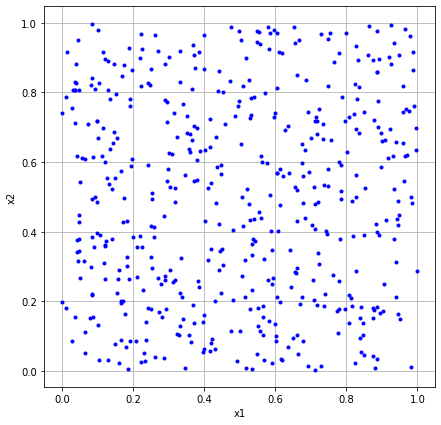

In [35]:
analysis.plot_data(data)

In [36]:
target = analysis.classify_data(data)
print(target[0:30])
print(data[0:20])

['type3' 'type3' 'type1' 'type2' 'type1' 'type0' 'type1' 'type6' 'type0'
 'type0' 'type6' 'type0' 'type2' 'type3' 'type3' 'type0' 'type2' 'type1'
 'type1' 'type6' 'type0' 'type1' 'type3' 'type0' 'type3' 'type1' 'type3'
 'type6' 'type2' 'type1']
[[5.36114865e-01 3.32618724e-01]
 [6.77734923e-01 8.54678352e-02]
 [7.48277614e-01 5.30730777e-01]
 [8.14868191e-01 4.88343712e-01]
 [5.29360367e-01 7.26059288e-01]
 [6.56636327e-01 5.28120041e-01]
 [3.18145434e-01 2.61931472e-01]
 [9.96246026e-01 6.98715346e-01]
 [1.36769810e-01 7.81572801e-01]
 [4.29222613e-02 3.40118060e-01]
 [6.38397998e-05 1.97447386e-01]
 [3.17142272e-01 5.26380231e-01]
 [6.45842436e-02 1.11926515e-01]
 [8.86174923e-01 1.84448692e-01]
 [5.52627141e-01 1.79208961e-01]
 [5.15625895e-01 3.17966950e-01]
 [1.05943529e-01 3.04187464e-02]
 [7.47256409e-01 3.91862970e-01]
 [8.28863104e-01 7.81036946e-01]
 [8.51161840e-01 7.43205672e-01]]


In [37]:
# print(len(target[target=='type0']))
# print(len(target[target=='type1']))
# print(len(target[target=='type2']))
# print(len(target[target=='type3']))
for i in range(8):
    print(len(target[target=='type' + str(i)]))

126
70
50
75
0
0
62
59


In [31]:
encoded_target = analysis.encode_data(target)
print(encoded_target[0:10])

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [9]:
(x_train, x_test) = analysis.get_train_And_test(data, 80)
print(x_train[0 : 4])
(t_train, t_test) = analysis.get_train_And_test(encoded_target, 80)
print(t_train[0 : 4])

기준  400
[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]]
기준  400
[[0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]]


In [ ]:
(model, hist) = analysis.create_model(x_train, t_train, 100, 16)

W1117 01:06:26.753325 16348 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 01:06:26.830117 16348 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 01:06:26.848071 16348 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1117 01:06:27.050576 16348 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1117 01:06:27.142314 16348 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 2.1403 - acc: 0.1250
Epoch 2/100
400/400 [==============================] - 0s 339us/step - loss: 2.0973 - acc: 0.1250
Epoch 3/100
400/400 [==============================] - 0s 242us/step - loss: 2.0789 - acc: 0.1250
Epoch 4/100
400/400 [==============================] - 0s 229us/step - loss: 2.0702 - acc: 0.1375
Epoch 5/100
400/400 [==============================] - 0s 217us/step - loss: 2.0666 - acc: 0.1525
Epoch 6/100
400/400 [==============================] - 0s 187us/step - loss: 2.0647 - acc: 0.1525
Epoch 7/100
400/400 [==============================] - 0s 212us/step - loss: 2.0634 - acc: 0.1525
Epoch 8/100
400/400 [==============================] - 0s 202us/step - loss: 2.0608 - acc: 0.1525
Epoch 9/100
400/400 [==============================] - 0s 227us/step - loss: 2.0597 - acc: 0.1525
Epoch 10/100
400/400 [==============================] - 0s 376us/step - loss: 2.0579 - acc: 0.1525
Epoch 11/100
400/400 

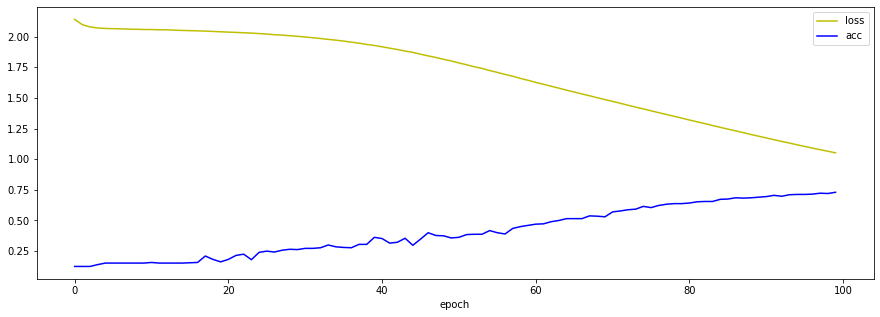

In [11]:
analysis.plot_history(hist)

In [12]:
analysis.evaluate_model(model, x_test, t_test)

100/100 [==============================] - 0s 858us/step


[1.0645342588424682, 0.69]